# Lung cancer detector 

### import libs

In [57]:
import pandas as pd 
import numpy as np 
import os 
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense , Dropout, Conv2D, MaxPooling2D,Flatten
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img, load_img
from tensorflow.keras.optimizers import Adam, Adamax
from sklearn.model_selection import train_test_split
from glob import glob
from keras.utils import to_categorical


### Load Data

This data consists from 15000 Images 

-5000 acadenocarcinomas

-5000 benign

-5000 squamous cell carcinoma

In [11]:
lung_aca_dir='Lung cnacer/lung_image_sets/lung_aca'
lung_n_dir="Lung cnacer/lung_image_sets/lung_n"
lung_scc_dir="Lung cnacer/lung_image_sets/lung_scc"

aca_list=os.listdir(lung_aca_dir)
n_list=os.listdir(lung_n_dir)
scc_list=os.listdir(lung_scc_dir)

lung_aca_file_paths=[]
lung_n_file_paths=[]
lung_scc_file_paths=[]

for i in range(5000):
    lung_aca_file_paths.append( os.path.join(lung_aca_dir,aca_list[i]))
    lung_n_file_paths.append( os.path.join(lung_n_dir,n_list[i]))
    lung_scc_file_paths.append( os.path.join(lung_scc_dir,scc_list[i]))

## I'm gonna label (benign=0) (acadenocarcinomas=1) (squamous cell carcinoma=2)

df=pd.DataFrame({'image':[ data for data in lung_aca_file_paths + lung_n_file_paths +lung_scc_file_paths], 'labels': [1] * 5000 + [0] * 5000 + [2]*5000})
df.head()

,image,labels
0,Lung cnacer/lung_image_sets/lung_aca\lungaca1....,1
1,Lung cnacer/lung_image_sets/lung_aca\lungaca10...,1
2,Lung cnacer/lung_image_sets/lung_aca\lungaca10...,1
3,Lung cnacer/lung_image_sets/lung_aca\lungaca10...,1
4,Lung cnacer/lung_image_sets/lung_aca\lungaca10...,1


In [39]:
image_list_of_arrays=[]
target_size=(128,128)

for i in range(len(df['image'])):
    img=load_img(df['image'][i],target_size=target_size)
    images_array=img_to_array(img)/255
    image_list_of_arrays.append(images_array)

data=np.array(image_list_of_arrays)
labels=df['labels'].to_numpy()

### Visualization

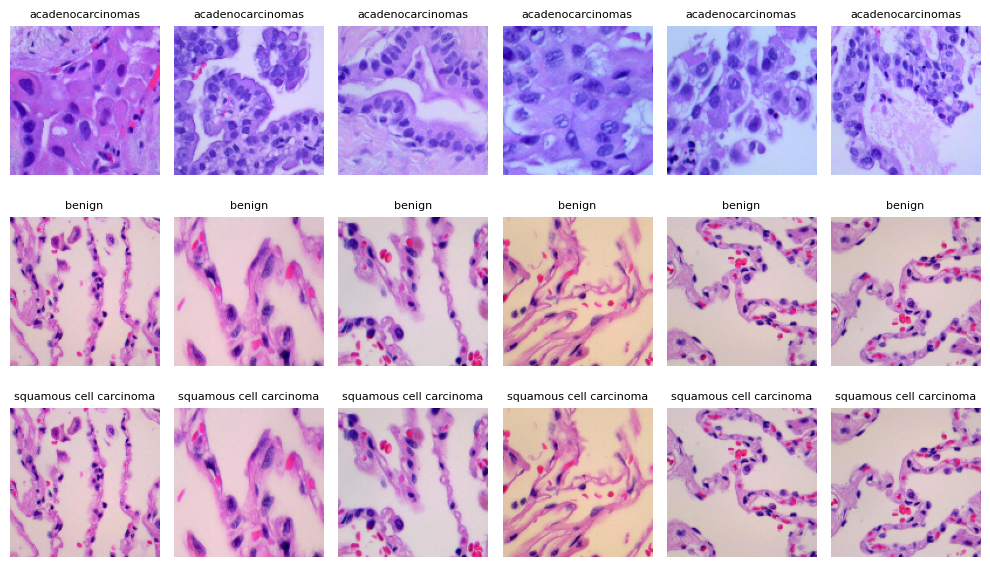

In [40]:
fig, ax=plt.subplots(3,6,figsize=(10,6))

for i in range(6):
    ax[0,i].imshow(data[i])
    ax[0,i].set_title('acadenocarcinomas',fontsize=8)
    ax[0,i].axis('off')

    ax[1,i].imshow(data[i+5000])
    ax[1,i].set_title('benign',fontsize=8)
    ax[1,i].axis('off')

    ax[2,i].imshow(data[i+5000])
    ax[2,i].set_title('squamous cell carcinoma',fontsize=8)
    ax[2,i].axis('off')



plt.tight_layout()
plt.show()

### Spliting Data

In [59]:
labels_one_hot = to_categorical(labels, num_classes=3)

In [60]:
x_train,x_test,y_train,y_test=train_test_split(data,labels_one_hot,test_size=.2,random_state=42)

In [82]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(2,2),input_shape=(target_size[0],target_size[1],3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32,kernel_size=(2,2),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(16,kernel_size=(2,2),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_43 (Conv2D)          (None, 127, 127, 32)      416       
                                                                 
 max_pooling2d_42 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_44 (Conv2D)          (None, 62, 62, 32)        4128      
                                                                 
 max_pooling2d_43 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_45 (Conv2D)          (None, 30, 30, 16)        2064      
                                                                 
 max_pooling2d_44 (MaxPooli  (None, 15, 15, 16)      

In [83]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [84]:
class DisplayEveryNEpochs(tf.keras.callbacks.Callback):
    def __init__(self, n=10):
        super(DisplayEveryNEpochs, self).__init__()
        self.n = n

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.n == 0:
            print(f"Epoch {epoch + 1}/{self.params['epochs']}:")
            print(f"Training loss: {logs['loss']:.4f}, Training accuracy: {logs['accuracy']:.4f}")
            print(f"Validation loss: {logs['val_loss']:.4f}, Validation accuracy: {logs['val_accuracy']:.4f}")

In [85]:
history=model.fit(x_train,y_train,epochs=50,batch_size=32,validation_data=(x_test,y_test)
                  ,verbose=0,
          callbacks=[DisplayEveryNEpochs(n=5)])

Epoch 5/50:
Training loss: 0.1288, Training accuracy: 0.9498
Validation loss: 0.1707, Validation accuracy: 0.9373
Epoch 10/50:
Training loss: 0.0523, Training accuracy: 0.9802
Validation loss: 0.1827, Validation accuracy: 0.9510
Epoch 15/50:
Training loss: 0.0187, Training accuracy: 0.9937
Validation loss: 0.1747, Validation accuracy: 0.9507
Epoch 20/50:
Training loss: 0.0119, Training accuracy: 0.9961
Validation loss: 0.1753, Validation accuracy: 0.9607
Epoch 25/50:
Training loss: 0.0001, Training accuracy: 1.0000
Validation loss: 0.1967, Validation accuracy: 0.9683
Epoch 30/50:
Training loss: 0.0000, Training accuracy: 1.0000
Validation loss: 0.2222, Validation accuracy: 0.9693
Epoch 35/50:
Training loss: 0.0000, Training accuracy: 1.0000
Validation loss: 0.2410, Validation accuracy: 0.9697
Epoch 40/50:
Training loss: 0.0000, Training accuracy: 1.0000
Validation loss: 0.2661, Validation accuracy: 0.9683
Epoch 45/50:
Training loss: 0.0000, Training accuracy: 1.0000
Validation loss: 0.

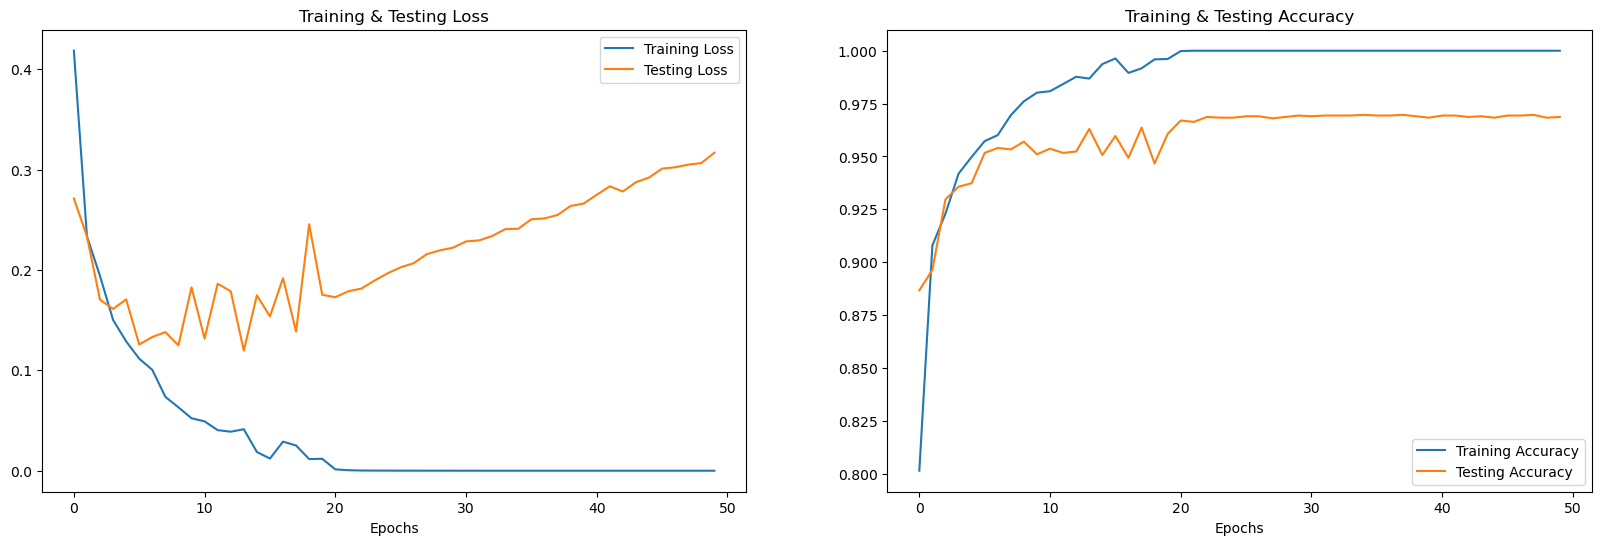

In [86]:
epochs = [i for i in range(len(history.history['loss']))]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()